## Veri Yogun Uygulamalar Modul Projesi: Zaman serisi siniflandirma problemi

In [1]:
import yfinance
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

### Sektorlerin listesine web-scraping ile erisilmesi

In [2]:
def fetch_sectors_names():
    url = "https://stockanalysis.com/stocks/industry/sectors/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(str(soup.find_all("table")))[0]
    else:
        print(f"Error: Failed to fetch data from page {url}")
        
    return df

def fetch_industry_names():
    url = "https://stockanalysis.com/stocks/industry/all/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(str(soup.find_all("table")))[0]
    else:
        print(f"Error: Failed to fetch data from page {url}")
        
    return df

def fetch_data(sectors):
    url = f"https://stockanalysis.com/stocks/sector/{sectors}/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(str(soup.find_all("table")))[0]
        df.drop(columns='No.', inplace=True)
    else:
        print(f"Error: Failed to fetch data from page {url}")
        
    return df

In [3]:
sectors=fetch_sectors_names()
indusrty=fetch_industry_names()

C:\Users\Merve\AppData\Local\Temp\ipykernel_20628\1494564969.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df=pd.read_html(str(soup.find_all("table")))[0]
C:\Users\Merve\AppData\Local\Temp\ipykernel_20628\1494564969.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df=pd.read_html(str(soup.find_all("table")))[0]


In [4]:
sectors

,Sector Name,Stocks,Market Cap,Div. Yield,PE Ratio,Profit Margin,1D Change,1Y Change
0,Financials,1385,"9,689.51B",2.41%,14.71,17.75%,0.53%,11.60%
1,Healthcare,1217,"8,168.27B",0.43%,50.93,4.07%,3.28%,7.75%
2,Technology,788,17.72T,0.43%,44.88,13.16%,0.32%,14.87%
3,Industrials,652,"5,478.41B",1.11%,26.71,7.32%,0.55%,17.56%
4,Consumer Discretionary,577,"7,264.64B",0.65%,27.33,5.95%,0.31%,2.23%
5,Real Estate,264,"1,505.41B",4.13%,50.68,8.89%,-0.12%,6.92%
6,Materials,263,"2,069.59B",1.56%,19.61,8.68%,0.47%,2.27%
7,Communication Services,260,"5,361.58B",1.09%,28.01,10.40%,0.29%,2.10%
8,Energy,253,"3,646.11B",2.85%,8.01,12.42%,0.43%,18.22%
9,Consumer Staples,241,"4,035.47B",1.45%,29.74,4.72%,0.44%,12.15%


### Sektor listerine erismek
Hangi sembollerin hangi sektorlerde oldugu bilgisine erisim saglanıp ve asagidaki betikler yardimi ile .csv dosyalarinda saklanmıştır.

In [45]:
fetch_data(sectors='energy').to_csv('data/stock_sectors/energy.csv')
fetch_data(sectors='financials').to_csv('data/stock_sectors/financials.csv')
fetch_data(sectors='healthcare').to_csv('data/stock_sectors/healthcare.csv')
fetch_data(sectors='technology').to_csv('data/stock_sectors/technology.csv')
fetch_data(sectors='utilities').to_csv('data/stock_sectors/utilities.csv')
fetch_data(sectors='real-estate').to_csv('data/stock_sectors/real-estate.csv')
fetch_data(sectors='materials').to_csv('data/stock_sectors/materials.csv')
fetch_data(sectors='technology').to_csv('data/stock_sectors/technology.csv')
fetch_data(sectors='industrials').to_csv('data/stock_sectors/industrials.csv')
fetch_data(sectors='consumer-staples').to_csv('data/stock_sectors/consumer-staples.csv')
fetch_data(sectors='consumer-discretionary').to_csv('data/stock_sectors/consumer-discretionary.csv')
fetch_data(sectors='communication-services').to_csv('data/stock_sectors/communication-services.csv')

C:\Users\Merve\AppData\Local\Temp\ipykernel_2088\1494564969.py:28: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df=pd.read_html(str(soup.find_all("table")))[0]
C:\Users\Merve\AppData\Local\Temp\ipykernel_2088\1494564969.py:28: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df=pd.read_html(str(soup.find_all("table")))[0]
C:\Users\Merve\AppData\Local\Temp\ipykernel_2088\1494564969.py:28: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df=pd.read_html(str(soup.find_all("table")))[0]
C:\Users\Merve\AppData\Local\Temp\ipykernel_2088\1494564969.py:28: FutureWarning: Passing literal html to 'read_html' is deprecated and will b

### Sektörlere ait sembol bilgilerine erişilmesi-Health,Finance,Technology

In [5]:
finance = pd.read_csv('data/stock_sectors/financials.csv')
finance.Symbol

0      BRK.B
1          V
2        JPM
3         MA
4        BAC
       ...  
993     NCPL
994     TIRX
995     RELI
996      DXF
997    AIMAU
Name: Symbol, Length: 998, dtype: object

In [6]:
healthcare = pd.read_csv('data/stock_sectors/healthcare.csv')
healthcare.Symbol

0        LLY
1        NVO
2        UNH
3        JNJ
4       ABBV
        ... 
1212    MOTS
1213    REVB
1214     NBY
1215     GRI
1216    RNAZ
Name: Symbol, Length: 1217, dtype: object

In [7]:
technology = pd.read_csv('data/stock_sectors/technology.csv')
technology.Symbol

0      MSFT
1      AAPL
2      NVDA
3       TSM
4      AVGO
       ... 
781    SYTA
782    XTKG
783    WISA
784    ASTI
785    BCAN
Name: Symbol, Length: 786, dtype: object

### Sektörlere ait sembollerin verilerini belli bir tarih sonrasindaki aylık getirilerine erişilmesi

İlk olarak, yfinance ve pandas kütüphaneleri içe aktarılır. Bu kütüphaneler, finansal verileri indirmek ve verilerle çalışmak için kullanılacaktır.

financials.csv dosyasından sembollerin bulunduğu sütunu içeren bir veri çerçevesi (finance) oluşturulur. Bu dosya, finans sektöründeki hisse senetlerinin sembollerini içermelidir.

tolist() metodu kullanılarak, hisse senedi sembollerini içeren bir liste (ticker_list) oluşturulur.

yf.download() işlevi, yfinance kütüphanesini kullanarak belirtilen hisse senetlerinin verilerini indirir. start parametresi ile belirtilen tarihten (2005-01-01), mevcut tarihe kadar olan tüm verileri alır.

resample() işlevi, verilerin zaman aralığını değiştirmek için kullanılır. Burada, aylık açılış fiyatlarını elde etmek için 'M' (aylık) frekansıyla örnekleme yapılır.


pct_change() yöntemi, ardışık öğeler arasındaki yüzde değişimini hesaplar. Bu, fiyat değişimlerinin yüzdesel olarak nasıl değiştiğini hesaplamak için kullanılır.

Son olarak, önceki adımlardan gelen veriler üzerinde işlenmiş aylık kapanış fiyatları ve yüzde değişimleri içeren bir veri serisi oluşturulur (ticker_monthly_open_finance)

3 büyük sektör için bu adımlar tekrarlanacaktır.

#### Finance sektörü için verilerin oluşturulması

In [133]:
import yfinance as yf
import pandas as pd

# Finans sektöründeki tüm hisselerin sembollerini oku
finance = pd.read_csv('data/stock_sectors/financials.csv')
ticker_list = finance['Symbol'].tolist()

ticker_data = yf.download(ticker_list, start='2005-01-01')
# Aylık açılış fiyatlarını al ve yüzde değişimini hesapla
ticker_monthly_open_finance = ticker_data['Open'].resample('M').last().pct_change()+1


[*********************100%%**********************]  998 of 998 completed

8 Failed downloads:
['BRK.B', 'AGM.A', 'LEGT', 'DISA', 'DYCQ', 'CRD.B', 'CRD.A', 'BNRE.A']: Exception('%ticker%: No timezone found, symbol may be delisted')
C:\Users\Merve\AppData\Local\Temp\ipykernel_20628\3490453767.py:10: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ticker_monthly_open_finance = ticker_data['Open'].resample('M').last().pct_change()+1


In [9]:
ticker_monthly_open_finance

Ticker,AACI,AACT,AAMC,AAME,AB,ABCB,ABL,ABTS,AC,ACAB,...,WU,WULF,XFIN,XP,XYF,YOTA,YRD,ZEO,ZION,ZLS
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-28,NaN,NaN,NaN,1.006645,1.069536,1.078607,NaN,NaN,NaN,NaN,...,NaN,0.891429,NaN,NaN,NaN,NaN,NaN,NaN,0.998796,NaN
2005-03-31,NaN,NaN,NaN,1.000000,0.981152,0.951476,NaN,NaN,NaN,NaN,...,NaN,0.921474,NaN,NaN,NaN,NaN,NaN,NaN,1.034504,NaN
2005-04-30,NaN,NaN,NaN,0.990099,0.971293,1.018034,NaN,NaN,NaN,NaN,...,NaN,0.784348,NaN,NaN,NaN,NaN,NaN,NaN,1.019516,NaN
2005-05-31,NaN,NaN,NaN,1.000000,1.005778,1.018286,NaN,NaN,NaN,NaN,...,NaN,1.019956,NaN,NaN,NaN,NaN,NaN,NaN,1.018286,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,1.006579,1.007775,0.874677,1.201183,0.996522,1.155592,1.142016,1.104651,0.990828,1.000000,...,1.065514,1.088496,1.001881,1.171079,1.051852,1.001880,1.285088,1.005348,1.181183,1.004726
2023-12-31,1.005602,1.007715,1.394984,1.088670,1.086562,1.248714,1.454155,1.263158,1.060018,0.998113,...,1.018787,2.479675,1.005634,1.147826,0.856807,0.970919,1.037543,0.998227,1.256685,1.005644
2024-01-31,1.011142,1.004785,1.128090,1.194570,1.087054,0.952639,1.241379,0.875000,0.953803,1.022684,...,1.074602,0.590164,1.007470,0.962121,1.073973,1.024155,1.559210,1.012433,0.944905,1.005613


In [10]:
# Tarihleri sütun haline getir
ticker_monthly_open_finance = ticker_monthly_open_finance.reset_index()

# Ticker adlarını satırlara dönüştürme
ticker_monthly_open_finance = ticker_monthly_open_finance.melt(id_vars=['Date'], var_name='Ticker', value_name='Open')
ticker_monthly_open_finance

,Date,Ticker,Open
0,2005-01-31,AACI,NaN
1,2005-02-28,AACI,NaN
2,2005-03-31,AACI,NaN
3,2005-04-30,AACI,NaN
4,2005-05-31,AACI,NaN
...,...,...,...
230533,2023-11-30,ZLS,1.004726
230534,2023-12-31,ZLS,1.005644
230535,2024-01-31,ZLS,1.005613
230536,2024-02-29,ZLS,1.000000


In [11]:
# NaN değerlerikontrol et
print(ticker_monthly_open_finance.isna().sum())

Date          0
Ticker        0
Open      98591
dtype: int64


In [12]:
# NaN değerleri içeren satırları sil
ticker_monthly_open_finance = ticker_monthly_open_finance.dropna()

# NaN değerlerinin silinip silinmediğini kontrol et
print(ticker_monthly_open_finance.isna().sum())
ticker_monthly_open_finance

Date      0
Ticker    0
Open      0
dtype: int64


,Date,Ticker,Open
203,2021-12-31,AACI,1.001533
204,2022-01-31,AACI,1.000000
205,2022-02-28,AACI,1.000000
206,2022-03-31,AACI,1.006122
207,2022-04-30,AACI,1.000000
...,...,...,...
230533,2023-11-30,ZLS,1.004726
230534,2023-12-31,ZLS,1.005644
230535,2024-01-31,ZLS,1.005613
230536,2024-02-29,ZLS,1.000000


#### Healthcare sektörü için verilerin oluşturulması

In [132]:
# healthcare sektöründeki tüm hisselerin sembollerini oku
healthcare = pd.read_csv('data/stock_sectors/healthcare.csv')
ticker_list = healthcare['Symbol'].tolist()

ticker_data_health = yf.download(ticker_list, start='2005-01-01')
# Aylık açılış fiyatlarını al ve yüzde değişimini hesapla
ticker_monthly_open_health = ticker_data_health['Open'].resample('M').last().pct_change()+1

[*********************100%%**********************]  1217 of 1217 completed

1 Failed download:
['BIO.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2005-01-01 -> 2024-03-18)')
C:\Users\Merve\AppData\Local\Temp\ipykernel_20628\1084046733.py:7: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ticker_monthly_open_health = ticker_data_health['Open'].resample('M').last().pct_change()+1


In [14]:
ticker_monthly_open_health

Ticker,A,AADI,ABBV,ABCL,ABEO,ABIO,ABOS,ABSI,ABT,ABUS,...,ZLAB,ZNTL,ZOM,ZTEK,ZTS,ZURA,ZVRA,ZVSA,ZYME,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-28,1.073382,NaN,NaN,NaN,0.971223,0.959158,NaN,NaN,1.022090,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
2005-03-31,0.946072,NaN,NaN,NaN,0.888889,0.841290,NaN,NaN,1.010374,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.793105
2005-04-30,0.933573,NaN,NaN,NaN,1.083333,0.944785,NaN,NaN,1.034011,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.217389
2005-05-31,1.141827,NaN,NaN,NaN,0.884615,1.240260,NaN,NaN,0.996069,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,1.242718,1.324257,0.971286,1.193548,1.307895,1.061798,1.050926,1.371901,1.104899,1.084746,...,1.109921,0.685785,1.118421,0.900763,1.111295,0.955194,1.132558,0.990099,1.293353,1.027778
2023-12-31,1.086484,0.392523,1.119774,1.237006,1.044266,0.904762,1.687225,2.879518,1.064096,1.322917,...,0.982839,1.420000,1.217647,0.872881,1.123629,1.029851,1.217659,0.282000,1.196648,1.176216
2024-01-31,0.967930,0.847619,1.072538,0.882353,0.857418,0.947368,0.856397,0.822176,1.032609,0.968504,...,0.795562,0.774008,0.652174,1.330097,0.976866,0.658385,1.000000,0.597771,1.006536,1.075368


In [15]:
# Tarihleri sütun haline getir
ticticker_monthly_open_health =ticker_monthly_open_health.reset_index()

# Ticker adlarını satırlara dönüştürme
ticticker_monthly_open_health =ticker_monthly_open_health.melt(id_vars=['Date'], var_name='Ticker', value_name='Open')
ticticker_monthly_open_health

,Date,Ticker,Open
0,2005-01-31,A,NaN
1,2005-02-28,A,1.073382
2,2005-03-31,A,0.946072
3,2005-04-30,A,0.933573
4,2005-05-31,A,1.141827
...,...,...,...
281122,2023-11-30,ZYXI,1.027778
281123,2023-12-31,ZYXI,1.176216
281124,2024-01-31,ZYXI,1.075368
281125,2024-02-29,ZYXI,1.154701


In [16]:
# NaN değerleri kontrol et
print(ticker_monthly_open_health.isna().sum())

Date           0
Ticker         0
Open      150905
dtype: int64


In [17]:
# NaN değerleri içeren satırları sil
ticker_monthly_open_health = ticker_monthly_open_health.dropna()

# NaN değerlerinin silinip silinmediğini kontrol et
print(ticker_monthly_open_health.isna().sum())
ticker_monthly_open_health

Date      0
Ticker    0
Open      0
dtype: int64


,Date,Ticker,Open
1,2005-02-28,A,1.073382
2,2005-03-31,A,0.946072
3,2005-04-30,A,0.933573
4,2005-05-31,A,1.141827
5,2005-06-30,A,0.971789
...,...,...,...
281122,2023-11-30,ZYXI,1.027778
281123,2023-12-31,ZYXI,1.176216
281124,2024-01-31,ZYXI,1.075368
281125,2024-02-29,ZYXI,1.154701


In [18]:
technology = pd.read_csv('data/stock_sectors/technology.csv')

In [19]:
technology.iloc[540]

Unnamed: 0                540
Symbol                    NaN
Company Name    Nano Labs Ltd
Market Cap            139.27M
% Change                0.77%
Volume                  14978
Revenue               655.30M
Name: 540, dtype: object

#### Technology sektörü için verilerin oluşturulması

In [20]:
import yfinance as yf
import pandas as pd
# technology sektöründeki tüm hisselerin sembollerini oku
technology = pd.read_csv('data/stock_sectors/technology.csv')
ticker_list = technology['Symbol'].astype(str).tolist()


ticker_data_technology = yf.download(ticker_list, start='2005-01-01')
# Aylık açılış fiyatlarını al ve yüzde değişimini hesapla
ticker_monthly_open_technology = ticker_data_technology['Open'].resample('M').last().pct_change()


[*********************100%%**********************]  786 of 786 completed


In [21]:
ticker_monthly_open_technology

Ticker,AAOI,AAPL,ACIW,ACLS,ACMR,ACN,ADBE,ADEA,ADI,ADSK,...,YOU,ZBRA,ZENV,ZEPP,ZETA,ZFOX,ZI,ZM,ZS,ZUO
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-28,NaN,0.198176,0.106241,0.190476,NaN,-0.029183,0.095018,0.084777,0.070086,0.024290,...,NaN,-0.007514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-31,NaN,-0.049911,-0.000861,-0.163429,NaN,-0.015631,0.102535,0.052504,-0.032748,-0.005678,...,NaN,-0.065949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-30,NaN,-0.148410,-0.106896,-0.124317,NaN,-0.114414,-0.129698,-0.399770,-0.067713,0.059120,...,NaN,0.005333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-31,NaN,0.124758,0.099903,0.021841,NaN,0.052414,0.117019,0.150900,0.087098,0.199175,...,NaN,-0.087630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,1.005610,0.120992,0.356749,-0.007115,0.274658,0.140303,0.168400,0.144391,0.170479,0.085380,...,0.297297,0.111360,-0.169355,0.291262,0.098684,0.023392,-0.040268,0.135669,0.274732,0.310867
2023-12-31,0.521678,0.021386,0.130917,0.053901,0.187500,0.052633,-0.038564,0.308655,0.091113,0.132423,...,-0.028241,0.155687,0.155340,0.142857,0.061078,0.285714,0.306993,0.067115,0.116633,0.009444
2024-01-31,-0.245404,-0.035379,0.002289,-0.013900,-0.109774,0.054606,0.040111,-0.006374,-0.031821,0.046365,...,-0.064316,-0.090016,-0.042017,-0.177632,0.113996,-0.011111,-0.134296,-0.092217,0.062358,-0.040541


In [22]:
# Tarihleri sütun haline getir
ticker_monthly_open_technology = ticker_monthly_open_technology.reset_index()

# Ticker adlarını satırlara dönüştürme
ticker_monthly_open_technology = ticker_monthly_open_technology.melt(id_vars=['Date'], var_name='Ticker', value_name='Open')
ticker_monthly_open_technology

,Date,Ticker,Open
0,2005-01-31,AAOI,NaN
1,2005-02-28,AAOI,NaN
2,2005-03-31,AAOI,NaN
3,2005-04-30,AAOI,NaN
4,2005-05-31,AAOI,NaN
...,...,...,...
181561,2023-11-30,ZUO,0.310867
181562,2023-12-31,ZUO,0.009444
181563,2024-01-31,ZUO,-0.040541
181564,2024-02-29,ZUO,-0.139762


In [23]:
ticker_monthly_open_technology.isna().sum()

Date          0
Ticker        0
Open      80696
dtype: int64

In [24]:
# NaN değerleri içeren satırları sil
ticker_monthly_open_technology = ticker_monthly_open_technology.dropna()

# NaN değerlerinin silinip silinmediğini kontrol et
print(ticker_monthly_open_technology.isna().sum())

Date      0
Ticker    0
Open      0
dtype: int64


In [25]:
ticker_monthly_open_technology # tsfresh uygulanacak olan data

,Date,Ticker,Open
105,2013-10-31,AAOI,0.265000
106,2013-11-30,AAOI,0.024506
107,2013-12-31,AAOI,0.157407
108,2014-01-31,AAOI,-0.074667
109,2014-02-28,AAOI,0.696686
...,...,...,...
181561,2023-11-30,ZUO,0.310867
181562,2023-12-31,ZUO,0.009444
181563,2024-01-31,ZUO,-0.040541
181564,2024-02-29,ZUO,-0.139762


# Tsfresh ile Feature Extraction

Tsfresh, zaman serisi verilerinden çeşitli özelliklerin otomatik olarak çıkarılmasını sağlayan bir Python kütüphanesidir. Bu özellikler, zaman serisinin farklı özelliklerini ve örüntülerini temsil eder. Özellik çıkarımı, makine öğrenimi modelleri için uygun girdi verisi oluşturmanın önemli bir adımıdır çünkü bu sayede model, veri setindeki gizli örüntüleri ve ilişkileri daha doğru bir şekilde öğrenir. Tsfresh ile çıkarılan özellikler, modelin daha iyi performans göstermesini sağlar, el ile özellik mühendisliği yapma ihtiyacını azaltır ve yeni gelen verilere de uygulanabilir. Bu şekilde, zaman serisi verilerinin analizi daha etkili hale gelir.

### Technology verileri için tsfresh ile feature engineering yapilmasi

In [26]:
import tsfresh

In [27]:
df_features_technology = tsfresh.extract_features(ticker_monthly_open_technology, column_id='Ticker', column_sort='Date', 
                                       default_fc_parameters=tsfresh.feature_extraction.ComprehensiveFCParameters())

df_features_technology.columns

Feature Extraction: 100%|██████████| 40/40 [00:07<00:00,  5.27it/s]


Index(['Open__variance_larger_than_standard_deviation',
       'Open__has_duplicate_max', 'Open__has_duplicate_min',
       'Open__has_duplicate', 'Open__sum_values', 'Open__abs_energy',
       'Open__mean_abs_change', 'Open__mean_change',
       'Open__mean_second_derivative_central', 'Open__median',
       ...
       'Open__fourier_entropy__bins_5', 'Open__fourier_entropy__bins_10',
       'Open__fourier_entropy__bins_100',
       'Open__permutation_entropy__dimension_3__tau_1',
       'Open__permutation_entropy__dimension_4__tau_1',
       'Open__permutation_entropy__dimension_5__tau_1',
       'Open__permutation_entropy__dimension_6__tau_1',
       'Open__permutation_entropy__dimension_7__tau_1',
       'Open__query_similarity_count__query_None__threshold_0.0',
       'Open__mean_n_absolute_max__number_of_maxima_7'],
      dtype='object', length=783)

In [28]:
len(df_features_technology.columns)

783

In [29]:
df_features_technology.head()

,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,Open__median,...,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__query_similarity_count__query_None__threshold_0.0,Open__mean_n_absolute_max__number_of_maxima_7
AAOI,0.0,0.0,0.0,0.0,4.338814,10.576310,0.297342,-0.003273,0.000725,-0.030744,...,1.306471,1.919776,3.701139,1.789172,3.079022,4.250016,4.681221,4.775939,NaN,0.872806
AAPL,0.0,0.0,0.0,0.0,5.952634,2.194452,0.102629,-0.001109,0.000490,0.027885,...,1.281364,1.884422,3.760901,1.790142,3.159163,4.522647,5.235097,5.405457,NaN,0.265311
ACIW,0.0,0.0,0.0,1.0,2.507409,2.054737,0.101819,-0.000511,0.000148,0.007874,...,0.692241,1.278668,3.255464,1.788561,3.143335,4.513990,5.187317,5.386891,NaN,0.275904
ACLS,0.0,0.0,0.0,1.0,5.092298,6.749634,0.177583,-0.001069,0.000957,0.013420,...,1.188196,1.826451,3.717955,1.788837,3.152728,4.506759,5.209636,5.393080,NaN,0.563127
ACMR,0.0,0.0,0.0,0.0,4.811833,5.602951,0.310345,0.001300,-0.008051,0.008573,...,1.354448,1.900262,3.281268,1.785733,3.083930,3.992574,4.223629,4.248495,NaN,0.659240


Veri çerçevesine sektör etiketleri eklenir. Bu adım, her özelliğin hangi sektöre ait olduğunu belirtmek için yapılır. Burada, tüm satırların sektör etiketi "T" olarak belirlenmiştir. Diğer sektörler için de aynı işlem yapılmıştır.

In [30]:
# İlk sütundaki değerleri "T" olarak değiştir, ve sütun adını "Sector" olarak ayarla
df_features_technology.rename(columns={df_features_technology.columns[0]: 'Sector'}, inplace=True)
df_features_technology['Sector'] = 'T'  # Tüm değerleri 'T' olarak değiştirme

df_features_technology

,Sector,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,Open__median,...,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__query_similarity_count__query_None__threshold_0.0,Open__mean_n_absolute_max__number_of_maxima_7
AAOI,T,0.0,0.0,0.0,4.338814,10.576310,0.297342,-0.003273,0.000725,-0.030744,...,1.306471,1.919776,3.701139,1.789172,3.079022,4.250016,4.681221,4.775939,NaN,0.872806
AAPL,T,0.0,0.0,0.0,5.952634,2.194452,0.102629,-0.001109,0.000490,0.027885,...,1.281364,1.884422,3.760901,1.790142,3.159163,4.522647,5.235097,5.405457,NaN,0.265311
ACIW,T,0.0,0.0,1.0,2.507409,2.054737,0.101819,-0.000511,0.000148,0.007874,...,0.692241,1.278668,3.255464,1.788561,3.143335,4.513990,5.187317,5.386891,NaN,0.275904
ACLS,T,0.0,0.0,1.0,5.092298,6.749634,0.177583,-0.001069,0.000957,0.013420,...,1.188196,1.826451,3.717955,1.788837,3.152728,4.506759,5.209636,5.393080,NaN,0.563127
ACMR,T,0.0,0.0,0.0,4.811833,5.602951,0.310345,0.001300,-0.008051,0.008573,...,1.354448,1.900262,3.281268,1.785733,3.083930,3.992574,4.223629,4.248495,NaN,0.659240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZFOX,T,0.0,0.0,0.0,-1.621474,0.931447,0.125678,-0.000107,-0.002996,-0.000297,...,1.370515,1.817382,2.622996,1.768230,2.837155,3.485587,3.496508,3.465736,NaN,0.321151
ZI,T,0.0,0.0,0.0,-0.641507,0.986193,0.190596,0.003235,-0.002700,-0.023112,...,1.363188,1.774477,3.014947,1.758812,2.936766,3.578324,3.688879,3.663562,NaN,0.278391
ZM,T,0.0,0.0,0.0,0.749947,1.746247,0.169367,-0.003417,-0.001022,-0.000434,...,0.903384,1.379292,2.748145,1.775446,2.939232,3.558556,3.911968,3.944135,NaN,0.369520
ZS,T,0.0,0.0,0.0,2.870751,1.922551,0.166460,-0.002925,-0.000303,0.045431,...,1.380208,1.962726,3.320362,1.771000,3.077269,3.939091,4.163311,4.189655,NaN,0.358188


### Healthcare verileri için tsfresh ile feature engineering yapilmasi

In [31]:
df_features_health = tsfresh.extract_features(ticker_monthly_open_health, column_id='Ticker', column_sort='Date', 
                                       default_fc_parameters=tsfresh.feature_extraction.ComprehensiveFCParameters())

df_features_health.columns

Feature Extraction: 100%|██████████| 40/40 [00:10<00:00,  3.96it/s]


Index(['Open__variance_larger_than_standard_deviation',
       'Open__has_duplicate_max', 'Open__has_duplicate_min',
       'Open__has_duplicate', 'Open__sum_values', 'Open__abs_energy',
       'Open__mean_abs_change', 'Open__mean_change',
       'Open__mean_second_derivative_central', 'Open__median',
       ...
       'Open__fourier_entropy__bins_5', 'Open__fourier_entropy__bins_10',
       'Open__fourier_entropy__bins_100',
       'Open__permutation_entropy__dimension_3__tau_1',
       'Open__permutation_entropy__dimension_4__tau_1',
       'Open__permutation_entropy__dimension_5__tau_1',
       'Open__permutation_entropy__dimension_6__tau_1',
       'Open__permutation_entropy__dimension_7__tau_1',
       'Open__query_similarity_count__query_None__threshold_0.0',
       'Open__mean_n_absolute_max__number_of_maxima_7'],
      dtype='object', length=783)

In [32]:
len(df_features_health.columns)

783

In [33]:
df_features_health.head()

,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,Open__median,...,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__query_similarity_count__query_None__threshold_0.0,Open__mean_n_absolute_max__number_of_maxima_7
A,0.0,0.0,0.0,0.0,233.064922,237.851890,0.092876,-0.000115,0.000335,1.014532,...,1.014479,1.677535,3.528019,1.787516,3.104159,4.443318,5.167710,5.349758,NaN,1.228913
AADI,0.0,0.0,0.0,0.0,71.946917,75.855856,0.285026,-0.000463,0.000310,0.983730,...,1.290699,1.937719,3.371972,1.773966,3.040307,3.993012,4.199121,4.204693,NaN,1.489924
ABBV,0.0,0.0,0.0,0.0,135.934327,138.582182,0.080564,0.000120,-0.000626,1.016032,...,1.048282,1.673284,3.492883,1.751884,3.056965,4.198258,4.694559,4.830369,NaN,1.170471
ABCL,0.0,0.0,0.0,0.0,37.460459,37.071545,0.191321,-0.009158,0.005884,0.953545,...,1.487798,1.825199,2.857103,1.767102,2.894715,3.436523,3.526361,3.496508,NaN,1.210670
ABEO,0.0,0.0,0.0,1.0,230.916983,252.904471,0.287956,0.000847,-0.000694,0.961419,...,0.885954,1.541387,3.565636,1.785235,3.132960,4.451075,5.208126,5.374513,NaN,2.102701


In [34]:
# İlk sütundaki değerleri "T" olarak değiştir, ve sütun adını "Sector" olarak ayarla
df_features_health.rename(columns={df_features_health.columns[0]: 'Sector'}, inplace=True)
df_features_health['Sector'] = 'H'  # Tüm değerleri 'H' olarak değiştirme

df_features_health

,Sector,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,Open__median,...,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__query_similarity_count__query_None__threshold_0.0,Open__mean_n_absolute_max__number_of_maxima_7
A,H,0.0,0.0,0.0,233.064922,237.851890,0.092876,-0.000115,0.000335,1.014532,...,1.014479,1.677535,3.528019,1.787516,3.104159,4.443318,5.167710,5.349758,NaN,1.228913
AADI,H,0.0,0.0,0.0,71.946917,75.855856,0.285026,-0.000463,0.000310,0.983730,...,1.290699,1.937719,3.371972,1.773966,3.040307,3.993012,4.199121,4.204693,NaN,1.489924
ABBV,H,0.0,0.0,0.0,135.934327,138.582182,0.080564,0.000120,-0.000626,1.016032,...,1.048282,1.673284,3.492883,1.751884,3.056965,4.198258,4.694559,4.830369,NaN,1.170471
ABCL,H,0.0,0.0,0.0,37.460459,37.071545,0.191321,-0.009158,0.005884,0.953545,...,1.487798,1.825199,2.857103,1.767102,2.894715,3.436523,3.526361,3.496508,NaN,1.210670
ABEO,H,0.0,0.0,1.0,230.916983,252.904471,0.287956,0.000847,-0.000694,0.961419,...,0.885954,1.541387,3.565636,1.785235,3.132960,4.451075,5.208126,5.374513,NaN,2.102701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZURA,H,0.0,0.0,0.0,10.980132,10.955316,0.338715,0.024690,-0.025520,0.891074,...,0.796312,1.277034,1.945910,1.695743,2.197225,2.079442,1.945910,1.791759,NaN,1.077843
ZVRA,H,0.0,0.0,1.0,107.196333,115.003535,0.286662,-0.001349,-0.004293,0.966000,...,1.452413,2.124329,3.655247,1.782094,3.095687,4.245931,4.570608,4.615121,NaN,1.688972
ZVSA,H,0.0,0.0,0.0,21.808165,21.609863,0.309515,-0.009856,-0.020612,0.990099,...,1.377820,1.839297,2.245035,1.749978,2.523922,2.912494,2.926418,2.944439,NaN,1.161472
ZYME,H,0.0,0.0,0.0,84.110040,88.010544,0.195439,-0.000275,-0.000345,1.010974,...,1.295625,1.943617,3.440607,1.778137,3.068956,4.057885,4.285617,4.343805,NaN,1.395983


### Finance verileri için tsfresh ile feature engineering yapilmasi

In [35]:
df_features_finance = tsfresh.extract_features(ticker_monthly_open_finance, column_id='Ticker', column_sort='Date', 
                                       default_fc_parameters=tsfresh.feature_extraction.ComprehensiveFCParameters())

df_features_finance.columns

Feature Extraction: 100%|██████████| 40/40 [00:09<00:00,  4.00it/s]


Index(['Open__variance_larger_than_standard_deviation',
       'Open__has_duplicate_max', 'Open__has_duplicate_min',
       'Open__has_duplicate', 'Open__sum_values', 'Open__abs_energy',
       'Open__mean_abs_change', 'Open__mean_change',
       'Open__mean_second_derivative_central', 'Open__median',
       ...
       'Open__fourier_entropy__bins_5', 'Open__fourier_entropy__bins_10',
       'Open__fourier_entropy__bins_100',
       'Open__permutation_entropy__dimension_3__tau_1',
       'Open__permutation_entropy__dimension_4__tau_1',
       'Open__permutation_entropy__dimension_5__tau_1',
       'Open__permutation_entropy__dimension_6__tau_1',
       'Open__permutation_entropy__dimension_7__tau_1',
       'Open__query_similarity_count__query_None__threshold_0.0',
       'Open__mean_n_absolute_max__number_of_maxima_7'],
      dtype='object', length=783)

In [36]:
len(df_features_finance.columns)

783

In [37]:
df_features_finance.head()

,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,Open__median,...,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__query_similarity_count__query_None__threshold_0.0,Open__mean_n_absolute_max__number_of_maxima_7
AACI,0.0,0.0,0.0,1.0,28.125357,28.258248,0.013693,0.000145,-0.000042,1.005265,...,1.210558,1.767009,2.176186,1.745728,2.830713,3.178054,3.135494,3.091042,NaN,1.019949
AACT,0.0,0.0,0.0,0.0,9.037737,9.075687,0.002450,0.000237,-0.000558,1.003810,...,1.054920,1.332179,1.609438,0.955700,1.329661,1.609438,1.386294,1.098612,NaN,1.005120
AAMC,0.0,0.0,0.0,0.0,25.044186,29.305260,0.338314,0.004908,-0.009223,0.991054,...,0.793730,1.263626,2.311423,1.620593,2.293452,2.718473,2.798513,2.813355,NaN,1.473320
AAME,0.0,0.0,0.0,1.0,231.876674,238.060931,0.132384,-0.000171,-0.000157,1.000000,...,0.889028,1.508808,3.515792,1.779465,3.120384,4.448227,5.171158,5.368324,NaN,1.460903
AB,0.0,0.0,0.0,0.0,230.733769,233.301301,0.088467,-0.000258,0.000258,1.005889,...,0.623387,1.241455,3.214773,1.783427,3.111290,4.423633,5.205801,5.405457,NaN,1.194028


In [38]:
# İlk sütundaki değerleri "F" olarak değiştir, ve sütun adını "Sector" olarak ayarla
df_features_finance.rename(columns={df_features_finance.columns[0]: 'Sector'}, inplace=True)
df_features_finance['Sector'] = 'F'  # Tüm değerleri 'F' olarak değiştirme

df_features_finance

,Sector,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,Open__median,...,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__query_similarity_count__query_None__threshold_0.0,Open__mean_n_absolute_max__number_of_maxima_7
AACI,F,0.0,0.0,1.0,28.125357,28.258248,0.013693,0.000145,-0.000042,1.005265,...,1.210558,1.767009,2.176186,1.745728,2.830713,3.178054,3.135494,3.091042,NaN,1.019949
AACT,F,0.0,0.0,0.0,9.037737,9.075687,0.002450,0.000237,-0.000558,1.003810,...,1.054920,1.332179,1.609438,0.955700,1.329661,1.609438,1.386294,1.098612,NaN,1.005120
AAMC,F,0.0,0.0,0.0,25.044186,29.305260,0.338314,0.004908,-0.009223,0.991054,...,0.793730,1.263626,2.311423,1.620593,2.293452,2.718473,2.798513,2.813355,NaN,1.473320
AAME,F,0.0,0.0,1.0,231.876674,238.060931,0.132384,-0.000171,-0.000157,1.000000,...,0.889028,1.508808,3.515792,1.779465,3.120384,4.448227,5.171158,5.368324,NaN,1.460903
AB,F,0.0,0.0,0.0,230.733769,233.301301,0.088467,-0.000258,0.000258,1.005889,...,0.623387,1.241455,3.214773,1.783427,3.111290,4.423633,5.205801,5.405457,NaN,1.194028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YOTA,F,0.0,0.0,1.0,21.117440,21.238768,0.012931,-0.000255,-0.000859,1.005102,...,0.759547,1.366711,2.397895,1.690772,2.399204,2.751667,2.772589,2.708050,NaN,1.017388
YRD,F,0.0,0.0,0.0,100.905525,109.197994,0.245249,0.003175,-0.001356,0.983240,...,1.467624,2.121745,3.530657,1.778002,3.050394,4.014869,4.454808,4.517693,NaN,1.714045
ZEO,F,0.0,0.0,1.0,26.890147,26.859398,0.027616,-0.010275,-0.005435,1.004545,...,1.432757,1.970181,2.639057,1.735986,2.751916,3.075221,3.091042,3.044522,NaN,1.023887
ZION,F,0.0,0.0,0.0,231.060027,235.289455,0.109530,0.000052,0.000102,0.997205,...,1.034281,1.715718,3.582043,1.765319,3.113452,4.479124,5.222774,5.399268,NaN,1.371946


## Tsfresh sonrası sektör datalarını birleştirme

Finans, sağlık ve teknoloji sektörlerine ait özellikler içeren üç farklı DataFrame, pd.concat() fonksiyonuyla birleştirilir. Bu sayede, tüm sektörlere ait özellikler tek bir veri çerçevesinde birleştirilmiş olur.

In [39]:
# DataFrame'leri birleştirme
df_combined = pd.concat([df_features_finance, df_features_health, df_features_technology])
df_combined

,Sector,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,Open__median,...,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__query_similarity_count__query_None__threshold_0.0,Open__mean_n_absolute_max__number_of_maxima_7
AACI,F,0.0,0.0,1.0,28.125357,28.258248,0.013693,0.000145,-0.000042,1.005265,...,1.210558,1.767009,2.176186,1.745728,2.830713,3.178054,3.135494,3.091042,NaN,1.019949
AACT,F,0.0,0.0,0.0,9.037737,9.075687,0.002450,0.000237,-0.000558,1.003810,...,1.054920,1.332179,1.609438,0.955700,1.329661,1.609438,1.386294,1.098612,NaN,1.005120
AAMC,F,0.0,0.0,0.0,25.044186,29.305260,0.338314,0.004908,-0.009223,0.991054,...,0.793730,1.263626,2.311423,1.620593,2.293452,2.718473,2.798513,2.813355,NaN,1.473320
AAME,F,0.0,0.0,1.0,231.876674,238.060931,0.132384,-0.000171,-0.000157,1.000000,...,0.889028,1.508808,3.515792,1.779465,3.120384,4.448227,5.171158,5.368324,NaN,1.460903
AB,F,0.0,0.0,0.0,230.733769,233.301301,0.088467,-0.000258,0.000258,1.005889,...,0.623387,1.241455,3.214773,1.783427,3.111290,4.423633,5.205801,5.405457,NaN,1.194028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZFOX,T,0.0,0.0,0.0,-1.621474,0.931447,0.125678,-0.000107,-0.002996,-0.000297,...,1.370515,1.817382,2.622996,1.768230,2.837155,3.485587,3.496508,3.465736,NaN,0.321151
ZI,T,0.0,0.0,0.0,-0.641507,0.986193,0.190596,0.003235,-0.002700,-0.023112,...,1.363188,1.774477,3.014947,1.758812,2.936766,3.578324,3.688879,3.663562,NaN,0.278391
ZM,T,0.0,0.0,0.0,0.749947,1.746247,0.169367,-0.003417,-0.001022,-0.000434,...,0.903384,1.379292,2.748145,1.775446,2.939232,3.558556,3.911968,3.944135,NaN,0.369520
ZS,T,0.0,0.0,0.0,2.870751,1.922551,0.166460,-0.002925,-0.000303,0.045431,...,1.380208,1.962726,3.320362,1.771000,3.077269,3.939091,4.163311,4.189655,NaN,0.358188


Veri çerçevesindeki NaN (boş) değerler işlenir. İlk olarak, NaN değerden oluşan sütunlar kaldırılır. Ardından, sütunlardaki varyansı düşük olan özellikler de kaldırılır. Son olarak, sonsuz değerler tespit edilir ve bu değerler 0 ile değiştirilir.

In [40]:
df_combined.drop("Open__query_similarity_count__query_None__threshold_0.0", axis=1, inplace=True) # NaN değerden oluşan sütunu kaldır

In [41]:
df_combined

,Sector,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,Open__median,...,Open__fourier_entropy__bins_3,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__mean_n_absolute_max__number_of_maxima_7
AACI,F,0.0,0.0,1.0,28.125357,28.258248,0.013693,0.000145,-0.000042,1.005265,...,1.009614,1.210558,1.767009,2.176186,1.745728,2.830713,3.178054,3.135494,3.091042,1.019949
AACT,F,0.0,0.0,0.0,9.037737,9.075687,0.002450,0.000237,-0.000558,1.003810,...,1.054920,1.054920,1.332179,1.609438,0.955700,1.329661,1.609438,1.386294,1.098612,1.005120
AAMC,F,0.0,0.0,0.0,25.044186,29.305260,0.338314,0.004908,-0.009223,0.991054,...,0.687092,0.793730,1.263626,2.311423,1.620593,2.293452,2.718473,2.798513,2.813355,1.473320
AAME,F,0.0,0.0,1.0,231.876674,238.060931,0.132384,-0.000171,-0.000157,1.000000,...,0.464871,0.889028,1.508808,3.515792,1.779465,3.120384,4.448227,5.171158,5.368324,1.460903
AB,F,0.0,0.0,0.0,230.733769,233.301301,0.088467,-0.000258,0.000258,1.005889,...,0.299899,0.623387,1.241455,3.214773,1.783427,3.111290,4.423633,5.205801,5.405457,1.194028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZFOX,T,0.0,0.0,0.0,-1.621474,0.931447,0.125678,-0.000107,-0.002996,-0.000297,...,0.818808,1.370515,1.817382,2.622996,1.768230,2.837155,3.485587,3.496508,3.465736,0.321151
ZI,T,0.0,0.0,0.0,-0.641507,0.986193,0.190596,0.003235,-0.002700,-0.023112,...,0.887185,1.363188,1.774477,3.014947,1.758812,2.936766,3.578324,3.688879,3.663562,0.278391
ZM,T,0.0,0.0,0.0,0.749947,1.746247,0.169367,-0.003417,-0.001022,-0.000434,...,0.467652,0.903384,1.379292,2.748145,1.775446,2.939232,3.558556,3.911968,3.944135,0.369520
ZS,T,0.0,0.0,0.0,2.870751,1.922551,0.166460,-0.002925,-0.000303,0.045431,...,0.854891,1.380208,1.962726,3.320362,1.771000,3.077269,3.939091,4.163311,4.189655,0.358188


In [42]:
# İlk sütunu atlayarak işlem yapmak
threshold = 0.05  # eşik değeri
low_variance_cols = df_combined.iloc[:, 1:].columns[df_combined.iloc[:, 1:].var() < threshold]
df_combined.drop(low_variance_cols, axis=1, inplace=True)


c:\Users\Merve\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [43]:
df_combined

,Sector,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__median,Open__mean,Open__length,Open__standard_deviation,Open__variation_coefficient,...,Open__count_above__t_0,Open__count_below__t_0,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__mean_n_absolute_max__number_of_maxima_7
AACI,F,1.0,28.125357,28.258248,0.013693,1.005265,1.004477,28.0,0.015780,0.015710,...,1.000000,0.000000,1.210558,1.767009,2.176186,2.830713,3.178054,3.135494,3.091042,1.019949
AACT,F,0.0,9.037737,9.075687,0.002450,1.003810,1.004193,9.0,0.002465,0.002455,...,1.000000,0.000000,1.054920,1.332179,1.609438,1.329661,1.609438,1.386294,1.098612,1.005120
AAMC,F,0.0,25.044186,29.305260,0.338314,0.991054,1.043508,24.0,0.363516,0.348360,...,1.000000,0.000000,0.793730,1.263626,2.311423,2.293452,2.718473,2.798513,2.813355,1.473320
AAME,F,1.0,231.876674,238.060931,0.132384,1.000000,1.008159,230.0,0.136609,0.135503,...,1.000000,0.000000,0.889028,1.508808,3.515792,3.120384,4.448227,5.171158,5.368324,1.460903
AB,F,0.0,230.733769,233.301301,0.088467,1.005889,1.003190,230.0,0.089234,0.088950,...,1.000000,0.000000,0.623387,1.241455,3.214773,3.111290,4.423633,5.205801,5.405457,1.194028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZFOX,T,0.0,-1.621474,0.931447,0.125678,-0.000297,-0.042670,38.0,0.150635,-3.530210,...,0.500000,0.526316,1.370515,1.817382,2.622996,2.837155,3.485587,3.496508,3.465736,0.321151
ZI,T,0.0,-0.641507,0.986193,0.190596,-0.023112,-0.014256,45.0,0.147350,-10.336247,...,0.444444,0.555556,1.363188,1.774477,3.014947,2.936766,3.578324,3.688879,3.663562,0.278391
ZM,T,0.0,0.749947,1.746247,0.169367,-0.000434,0.012711,59.0,0.171569,13.497703,...,0.491525,0.508475,0.903384,1.379292,2.748145,2.939232,3.558556,3.911968,3.944135,0.369520
ZS,T,0.0,2.870751,1.922551,0.166460,0.045431,0.039872,72.0,0.158469,3.974484,...,0.638889,0.361111,1.380208,1.962726,3.320362,3.077269,3.939091,4.163311,4.189655,0.358188


In [44]:
# Sonsuz değerleri tespit et
is_inf = df_combined.isin([np.inf, -np.inf])

# Her sütunda en az bir sonsuz değer içeren satırları göster
rows_with_inf = is_inf.any(axis=1)
print("Sonsuz değer içeren satırlar:")
print(df_combined[rows_with_inf])


Sonsuz değer içeren satırlar:
      Sector  Open__has_duplicate  Open__sum_values  Open__abs_energy  \
AAMC       F                  0.0         25.044186         29.305260   
AEAE       F                  0.0         27.124752         27.251088   
AFAR       F                  0.0         21.105451         21.212094   
AIMAU      F                  1.0         23.127383         23.261215   
AOGO       F                  0.0         25.083731         25.168491   
...      ...                  ...               ...               ...   
WTO        T                  0.0         -2.671388          4.089542   
XPER       T                  0.0         -0.369502          0.539016   
YMM        T                  0.0         -0.022416          1.604172   
ZETA       T                  0.0          0.821414          1.197341   
ZI         T                  0.0         -0.641507          0.986193   

       Open__mean_abs_change  Open__median  Open__mean  Open__length  \
AAMC                0

In [45]:
# Sonsuz değerleri 0 ile doldur
df_combined.replace([np.inf, -np.inf], 0, inplace=True)


 Veriler, Min-Max ölçekleme yöntemi kullanılarak [0, 1] aralığına ölçeklenir. Bu sayede, verilerin farklı ölçeklerde olması durumunda modelin daha dengeli bir şekilde eğitilmesi sağlanır. Veri ölçeklendirmesi, makine öğrenimi modellerine giriş verilerini daha uygun bir şekilde sunmak için kullanılan bir tekniktir. Min-Max ölçekleme, veriyi belirli bir aralığa ölçeklemek için kullanılan bir yöntemdir.

In [46]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler nesnesini oluştur
scaler = MinMaxScaler()

# Özellikleri sütun bazında ölçeklendir
df_combined[df_combined.columns[1:]] = scaler.fit_transform(df_combined[df_combined.columns[1:]])


In [47]:
df_combined

,Sector,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__median,Open__mean,Open__length,Open__standard_deviation,Open__variation_coefficient,...,Open__count_above__t_0,Open__count_below__t_0,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__mean_n_absolute_max__number_of_maxima_7
AACI,F,1.0,0.008304,1.626726e-06,0.000321,0.810654,0.072587,0.117904,0.000058,0.386605,...,1.000000,0.000000,0.755628,0.786061,0.543056,0.893307,0.686616,0.590338,0.571183,0.001480
AACT,F,0.0,0.003982,5.218331e-07,0.000017,0.809824,0.072572,0.034934,0.000009,0.386600,...,1.000000,0.000000,0.658479,0.592625,0.401627,0.419610,0.347718,0.261006,0.203009,0.001455
AAMC,F,0.0,0.007606,1.687032e-06,0.009120,0.802554,0.074580,0.100437,0.001326,0.386724,...,1.000000,0.000000,0.495445,0.562129,0.576803,0.723759,0.587324,0.526892,0.519871,0.002237
AAME,F,1.0,0.054431,1.371111e-05,0.003538,0.807653,0.072775,1.000000,0.000498,0.386648,...,1.000000,0.000000,0.554929,0.671200,0.877347,0.984720,0.961035,0.973604,0.991995,0.002216
AB,F,0.0,0.054172,1.343696e-05,0.002348,0.811009,0.072521,1.000000,0.000326,0.386631,...,1.000000,0.000000,0.389117,0.552266,0.802229,0.981850,0.955722,0.980126,0.998856,0.001770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZFOX,T,0.0,0.001569,5.273458e-08,0.003357,0.237568,0.019120,0.161572,0.000550,0.385336,...,0.500000,0.526316,0.855473,0.808470,0.654555,0.895340,0.753058,0.658308,0.640422,0.000312
ZI,T,0.0,0.001791,5.588784e-08,0.005116,0.224565,0.020571,0.192140,0.000538,0.382900,...,0.444444,0.555556,0.850899,0.789383,0.752364,0.926774,0.773094,0.694527,0.676977,0.000241
ZM,T,0.0,0.002106,9.966605e-08,0.004541,0.237489,0.021948,0.253275,0.000626,0.391429,...,0.491525,0.508475,0.563890,0.613584,0.685785,0.927553,0.768823,0.736529,0.728824,0.000393
ZS,T,0.0,0.002586,1.098210e-07,0.004462,0.263629,0.023335,0.310044,0.000578,0.388021,...,0.638889,0.361111,0.861523,0.873127,0.828579,0.971114,0.851037,0.783850,0.774192,0.000374


Özelliklerde kalan NaN değerler, sütunların ortalaması ile doldurulur. Bu adım, veri setindeki eksik değerlerin model performansını etkilemesini önlemek için yapılmıştır.

In [48]:
# İlk sütunu atlayarak NaN değerleri sütun ortalaması ile doldur
numeric_columns = df_combined.iloc[:, 1:].select_dtypes(include=[np.number]).columns
df_combined[numeric_columns] = df_combined[numeric_columns].fillna(df_combined[numeric_columns].mean())


In [49]:
df_combined

,Sector,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__median,Open__mean,Open__length,Open__standard_deviation,Open__variation_coefficient,...,Open__count_above__t_0,Open__count_below__t_0,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__mean_n_absolute_max__number_of_maxima_7
AACI,F,1.0,0.008304,1.626726e-06,0.000321,0.810654,0.072587,0.117904,0.000058,0.386605,...,1.000000,0.000000,0.755628,0.786061,0.543056,0.893307,0.686616,0.590338,0.571183,0.001480
AACT,F,0.0,0.003982,5.218331e-07,0.000017,0.809824,0.072572,0.034934,0.000009,0.386600,...,1.000000,0.000000,0.658479,0.592625,0.401627,0.419610,0.347718,0.261006,0.203009,0.001455
AAMC,F,0.0,0.007606,1.687032e-06,0.009120,0.802554,0.074580,0.100437,0.001326,0.386724,...,1.000000,0.000000,0.495445,0.562129,0.576803,0.723759,0.587324,0.526892,0.519871,0.002237
AAME,F,1.0,0.054431,1.371111e-05,0.003538,0.807653,0.072775,1.000000,0.000498,0.386648,...,1.000000,0.000000,0.554929,0.671200,0.877347,0.984720,0.961035,0.973604,0.991995,0.002216
AB,F,0.0,0.054172,1.343696e-05,0.002348,0.811009,0.072521,1.000000,0.000326,0.386631,...,1.000000,0.000000,0.389117,0.552266,0.802229,0.981850,0.955722,0.980126,0.998856,0.001770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZFOX,T,0.0,0.001569,5.273458e-08,0.003357,0.237568,0.019120,0.161572,0.000550,0.385336,...,0.500000,0.526316,0.855473,0.808470,0.654555,0.895340,0.753058,0.658308,0.640422,0.000312
ZI,T,0.0,0.001791,5.588784e-08,0.005116,0.224565,0.020571,0.192140,0.000538,0.382900,...,0.444444,0.555556,0.850899,0.789383,0.752364,0.926774,0.773094,0.694527,0.676977,0.000241
ZM,T,0.0,0.002106,9.966605e-08,0.004541,0.237489,0.021948,0.253275,0.000626,0.391429,...,0.491525,0.508475,0.563890,0.613584,0.685785,0.927553,0.768823,0.736529,0.728824,0.000393
ZS,T,0.0,0.002586,1.098210e-07,0.004462,0.263629,0.023335,0.310044,0.000578,0.388021,...,0.638889,0.361111,0.861523,0.873127,0.828579,0.971114,0.851037,0.783850,0.774192,0.000374


In [79]:
df_combined.to_csv("combined_data.csv", index=False)

## Sektör verileri için model kurulması

Veri setini kullanarak bir destek vektör makinesi (SVM) sınıflandırıcı modeli eğitmek ve değerlendirmek için bir dizi işlemi gerçekleştirilmiştir. İlk olarak, veri setinden özellikler ve hedef değişken (Sektör) ayrıştırılır. Ardından, veri seti eğitim ve test alt kümelerine ayrılır, bu da modelin doğruluğunu değerlendirmek için kullanılır. Model eğitildikten sonra, test seti üzerinde tahminler yapılır ve bu tahminler gerçek etiketlerle karşılaştırılarak modelin performansı değerlendirilir. Doğruluk ölçütü kullanılarak modelin test setindeki performansı ölçülür ve sınıflandırma raporu (precision, recall, F1-score gibi) kullanılarak her bir sınıf için performans ayrıntılı olarak raporlanır. Son olarak, confusion matrix görselleştirilir, bu da modelin her bir sınıfı nasıl sınıflandırdığını daha açık bir şekilde gösterir. Confusion matrix, gerçek ve tahmin edilen sınıflar arasındaki ilişkiyi gösteren bir tablodur. Bu adımların tamamı, SVM sınıflandırıcı modelinin eğitiminden değerlendirilmesine kadar olan süreci kapsar ve modelin performansını anlamak için bir çerçeve sağlar.

In [50]:
X = df_combined.drop("Sector", axis=1)  # Özellikler
y = df_combined["Sector"]  # Target


In [51]:
X

,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__median,Open__mean,Open__length,Open__standard_deviation,Open__variation_coefficient,Open__variance,...,Open__count_above__t_0,Open__count_below__t_0,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__mean_n_absolute_max__number_of_maxima_7
AACI,1.0,0.008304,1.626726e-06,0.000321,0.810654,0.072587,0.117904,0.000058,0.386605,3.315013e-09,...,1.000000,0.000000,0.755628,0.786061,0.543056,0.893307,0.686616,0.590338,0.571183,0.001480
AACT,0.0,0.003982,5.218331e-07,0.000017,0.809824,0.072572,0.034934,0.000009,0.386600,8.089252e-11,...,1.000000,0.000000,0.658479,0.592625,0.401627,0.419610,0.347718,0.261006,0.203009,0.001455
AAMC,0.0,0.007606,1.687032e-06,0.009120,0.802554,0.074580,0.100437,0.001326,0.386724,1.759171e-06,...,1.000000,0.000000,0.495445,0.562129,0.576803,0.723759,0.587324,0.526892,0.519871,0.002237
AAME,1.0,0.054431,1.371111e-05,0.003538,0.807653,0.072775,1.000000,0.000498,0.386648,2.484390e-07,...,1.000000,0.000000,0.554929,0.671200,0.877347,0.984720,0.961035,0.973604,0.991995,0.002216
AB,0.0,0.054172,1.343696e-05,0.002348,0.811009,0.072521,1.000000,0.000326,0.386631,1.060037e-07,...,1.000000,0.000000,0.389117,0.552266,0.802229,0.981850,0.955722,0.980126,0.998856,0.001770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZFOX,0.0,0.001569,5.273458e-08,0.003357,0.237568,0.019120,0.161572,0.000550,0.385336,3.020746e-07,...,0.500000,0.526316,0.855473,0.808470,0.654555,0.895340,0.753058,0.658308,0.640422,0.000312
ZI,0.0,0.001791,5.588784e-08,0.005116,0.224565,0.020571,0.192140,0.000538,0.382900,2.890437e-07,...,0.444444,0.555556,0.850899,0.789383,0.752364,0.926774,0.773094,0.694527,0.676977,0.000241
ZM,0.0,0.002106,9.966605e-08,0.004541,0.237489,0.021948,0.253275,0.000626,0.391429,3.918652e-07,...,0.491525,0.508475,0.563890,0.613584,0.685785,0.927553,0.768823,0.736529,0.728824,0.000393
ZS,0.0,0.002586,1.098210e-07,0.004462,0.263629,0.023335,0.310044,0.000578,0.388021,3.343089e-07,...,0.638889,0.361111,0.861523,0.873127,0.828579,0.971114,0.851037,0.783850,0.774192,0.000374


In [52]:
y

AACI    F
AACT    F
AAMC    F
AAME    F
AB      F
       ..
ZFOX    T
ZI      T
ZM      T
ZS      T
ZUO     T
Name: Sector, Length: 2986, dtype: object

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear', random_state=42)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [57]:
from sklearn.metrics import accuracy_score, classification_report
# Eğitim seti doğruluğu
# Eğitim seti üzerinde tahmin yapma
y_train_pred = classifier.predict(X_train)

# Eğitim seti doğruluğu
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Eğitim seti doğruluğu:", train_accuracy)


Eğitim seti doğruluğu: 0.9229480737018425


In [58]:
y_pred = classifier.predict(X_test)# Test seti üzerinde tahmin yapma
accuracy = accuracy_score(y_test, y_pred)
print("Test seti doğruluğu:", accuracy)
print(classification_report(y_test, y_pred))# Sınıflandırma raporu


Test seti doğruluğu: 0.8779264214046822
              precision    recall  f1-score   support

           F       0.86      0.79      0.82       213
           H       0.82      0.88      0.85       232
           T       1.00      1.00      1.00       153

    accuracy                           0.88       598
   macro avg       0.89      0.89      0.89       598
weighted avg       0.88      0.88      0.88       598



In [59]:
from sklearn.metrics import confusion_matrix

# Confusion matrix oluştur
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[168  45   0]
 [ 28 204   0]
 [  0   0 153]]


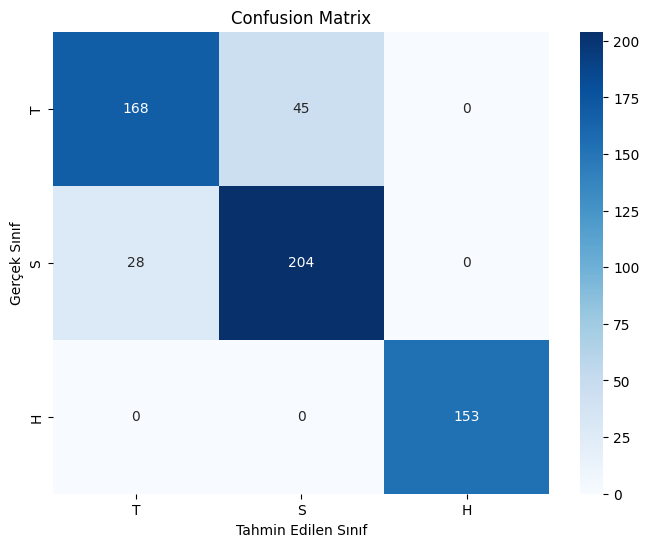

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['T', 'S', 'H'], yticklabels=['T', 'S', 'H'])
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Confusion Matrix')
plt.show()


Yukarıdaki Confusion matrix gerçek ve tahmin edilen sektör sınıfları arasındaki karşılaştırmayı göstermektedir.

#### Veriye Real Estate eklenmesi

In [74]:
# healthcare sektöründeki tüm hisselerin sembollerini oku
real_est = pd.read_csv('data/stock_sectors/real-estate.csv')
ticker_list = real_est['Symbol'].tolist()

ticker_data_real_est = yf.download(ticker_list, start='2005-01-01')
# Aylık açılış fiyatlarını al ve yüzde değişimini hesapla
ticker_monthly_open_real_est = ticker_data_real_est['Open'].resample('M').last().pct_change()+1


# Tarihleri sütun haline getir
ticker_monthly_open_real_est = ticker_monthly_open_real_est.reset_index()

# Ticker adlarını satırlara dönüştürme
ticker_monthly_open_real_est = ticker_monthly_open_real_est.melt(id_vars=['Date'], var_name='Ticker', value_name='Open')
print(ticker_monthly_open_real_est.isna().sum())
# NaN değerleri içeren satırları sil
ticker_monthly_open_real_est= ticker_monthly_open_real_est.dropna()

# NaN değerlerinin silinip silinmediğini kontrol et
print(ticker_monthly_open_real_est.isna().sum())
ticker_monthly_open_real_est

[*********************100%%**********************]  261 of 261 completed


Date          0
Ticker        0
Open      20325
dtype: int64
Date      0
Ticker    0
Open      0
dtype: int64


,Date,Ticker,Open
73,2011-02-28,AAT,1.008451
74,2011-03-31,AAT,0.973929
75,2011-04-30,AAT,1.055927
76,2011-05-31,AAT,1.011317
77,2011-06-30,AAT,1.012086
...,...,...,...
60286,2023-11-30,XIN,1.045113
60287,2023-12-31,XIN,0.992806
60288,2024-01-31,XIN,0.956522
60289,2024-02-29,XIN,1.007576


In [75]:
df_features_real_est= tsfresh.extract_features(ticker_monthly_open_real_est, column_id='Ticker', column_sort='Date', 
                                       default_fc_parameters=tsfresh.feature_extraction.ComprehensiveFCParameters())



Feature Extraction: 100%|██████████| 38/38 [00:04<00:00,  7.67it/s]


In [76]:
# İlk sütundaki değerleri "R" olarak değiştir, ve sütun adını "Sector" olarak ayarla
df_features_real_est.rename(columns={df_features_real_est.columns[0]: 'Sector'}, inplace=True)
df_features_real_est['Sector'] = 'R'  # Tüm değerleri 'R' olarak değiştirme

df_features_real_est

,Sector,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,Open__median,...,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__query_similarity_count__query_None__threshold_0.0,Open__mean_n_absolute_max__number_of_maxima_7
AAT,R,0.0,0.0,0.0,158.486358,159.952737,0.079729,-0.000281,0.000224,1.007065,...,0.859211,1.429178,3.165480,1.775244,3.081647,4.285595,4.885466,5.005640,NaN,1.191584
ABR,R,0.0,0.0,1.0,233.126069,246.522736,0.139924,-0.000385,0.000135,1.013573,...,1.263724,1.935714,3.813657,1.782477,3.123780,4.435879,5.218123,5.393080,NaN,1.648113
ACR,R,0.0,0.0,0.0,216.484763,219.833187,0.117777,0.000248,-0.000125,0.991432,...,1.102466,1.720386,3.638762,1.789169,3.149193,4.548303,5.210257,5.338718,NaN,1.396507
ACRE,R,0.0,0.0,0.0,142.806739,143.745132,0.089800,0.000638,0.000626,1.000724,...,1.181177,1.810495,3.595352,1.770246,3.081770,4.275540,4.756478,4.889624,NaN,1.185295
ADC,R,0.0,0.0,0.0,231.282758,233.837512,0.075568,0.000166,0.000065,1.006806,...,1.063714,1.720591,3.640796,1.786141,3.146699,4.523180,5.255906,5.405457,NaN,1.199753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WPC,R,0.0,0.0,0.0,231.013760,232.930816,0.071572,-0.000358,0.000638,1.005705,...,1.210995,1.874717,3.780137,1.788254,3.147925,4.527811,5.235097,5.393080,NaN,1.152364
WSR,R,0.0,0.0,0.0,163.655108,165.409355,0.082325,-0.000423,-0.000114,1.003497,...,1.183562,1.839258,3.531419,1.788667,3.093918,4.321599,4.892577,5.038586,NaN,1.183872
WY,R,0.0,0.0,0.0,230.572514,233.295845,0.098672,-0.000391,0.000027,1.002682,...,1.215042,1.858619,3.711128,1.787597,3.142079,4.531009,5.249745,5.399268,NaN,1.242275
XHR,R,0.0,0.0,0.0,109.299041,110.955471,0.114136,-0.001147,-0.000047,0.998981,...,1.217370,1.833579,3.423016,1.743847,3.086055,4.285771,4.604402,4.634729,NaN,1.268100


In [77]:
df_features_real_est.drop("Open__query_similarity_count__query_None__threshold_0.0", axis=1, inplace=True) # NaN değerden oluşan sütunu kaldır

In [78]:
df_features_real_est

,Sector,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,Open__median,...,Open__fourier_entropy__bins_3,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__mean_n_absolute_max__number_of_maxima_7
AAT,R,0.0,0.0,0.0,158.486358,159.952737,0.079729,-0.000281,0.000224,1.007065,...,0.417406,0.859211,1.429178,3.165480,1.775244,3.081647,4.285595,4.885466,5.005640,1.191584
ABR,R,0.0,0.0,1.0,233.126069,246.522736,0.139924,-0.000385,0.000135,1.013573,...,0.722127,1.263724,1.935714,3.813657,1.782477,3.123780,4.435879,5.218123,5.393080,1.648113
ACR,R,0.0,0.0,0.0,216.484763,219.833187,0.117777,0.000248,-0.000125,0.991432,...,0.667290,1.102466,1.720386,3.638762,1.789169,3.149193,4.548303,5.210257,5.338718,1.396507
ACRE,R,0.0,0.0,0.0,142.806739,143.745132,0.089800,0.000638,0.000626,1.000724,...,0.708261,1.181177,1.810495,3.595352,1.770246,3.081770,4.275540,4.756478,4.889624,1.185295
ADC,R,0.0,0.0,0.0,231.282758,233.837512,0.075568,0.000166,0.000065,1.006806,...,0.626161,1.063714,1.720591,3.640796,1.786141,3.146699,4.523180,5.255906,5.405457,1.199753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WPC,R,0.0,0.0,0.0,231.013760,232.930816,0.071572,-0.000358,0.000638,1.005705,...,0.763302,1.210995,1.874717,3.780137,1.788254,3.147925,4.527811,5.235097,5.393080,1.152364
WSR,R,0.0,0.0,0.0,163.655108,165.409355,0.082325,-0.000423,-0.000114,1.003497,...,0.722151,1.183562,1.839258,3.531419,1.788667,3.093918,4.321599,4.892577,5.038586,1.183872
WY,R,0.0,0.0,0.0,230.572514,233.295845,0.098672,-0.000391,0.000027,1.002682,...,0.733919,1.215042,1.858619,3.711128,1.787597,3.142079,4.531009,5.249745,5.399268,1.242275
XHR,R,0.0,0.0,0.0,109.299041,110.955471,0.114136,-0.001147,-0.000047,0.998981,...,0.759547,1.217370,1.833579,3.423016,1.743847,3.086055,4.285771,4.604402,4.634729,1.268100


In [80]:
# İlk sütunu atla
threshold = 0.05  # eşik değeri
low_variance_cols = df_features_real_est.iloc[:, 1:].columns[df_features_real_est.iloc[:, 1:].var() < threshold]
df_features_real_est.drop(low_variance_cols, axis=1, inplace=True)
df_features_real_est

c:\Users\Merve\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Sector,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__length,Open__skewness,Open__kurtosis,Open__absolute_sum_of_changes,Open__longest_strike_below_mean,Open__longest_strike_above_mean,...,"Open__augmented_dickey_fuller__attr_""usedlag""__autolag_""AIC""",Open__number_crossing_m__m_1,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__mean_n_absolute_max__number_of_maxima_7
AAT,R,0.0,158.486358,159.952737,158.0,-0.090328,9.176681,12.517502,4.0,6.0,...,13.0,83.0,0.859211,1.429178,3.165480,3.081647,4.285595,4.885466,5.005640,1.191584
ABR,R,1.0,233.126069,246.522736,230.0,6.772866,83.521455,32.042501,9.0,6.0,...,5.0,111.0,1.263724,1.935714,3.813657,3.123780,4.435879,5.218123,5.393080,1.648113
ACR,R,0.0,216.484763,219.833187,217.0,0.514203,13.347204,25.439845,7.0,6.0,...,9.0,99.0,1.102466,1.720386,3.638762,3.149193,4.548303,5.210257,5.338718,1.396507
ACRE,R,0.0,142.806739,143.745132,143.0,-1.714037,9.979226,12.751670,5.0,5.0,...,1.0,75.0,1.181177,1.810495,3.595352,3.081770,4.275540,4.756478,4.889624,1.185295
ADC,R,0.0,231.282758,233.837512,230.0,-0.051439,4.117478,17.305097,5.0,11.0,...,1.0,110.0,1.063714,1.720591,3.640796,3.146699,4.523180,5.255906,5.405457,1.199753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WPC,R,0.0,231.013760,232.930816,230.0,-0.260338,1.310165,16.389952,5.0,6.0,...,0.0,115.0,1.210995,1.874717,3.780137,3.147925,4.527811,5.235097,5.393080,1.152364
WSR,R,0.0,163.655108,165.409355,163.0,-1.102081,9.216485,13.336578,9.0,8.0,...,0.0,73.0,1.183562,1.839258,3.531419,3.093918,4.321599,4.892577,5.038586,1.183872
WY,R,0.0,230.572514,233.295845,230.0,-0.924496,5.826057,22.595990,5.0,5.0,...,0.0,123.0,1.215042,1.858619,3.711128,3.142079,4.531009,5.249745,5.399268,1.242275
XHR,R,0.0,109.299041,110.955471,109.0,1.577987,9.775133,12.326654,5.0,3.0,...,2.0,61.0,1.217370,1.833579,3.423016,3.086055,4.285771,4.604402,4.634729,1.268100


In [81]:
# Sonsuz değerleri tespit et
is_inf = df_features_real_est.isin([np.inf, -np.inf])

# Her sütunda en az bir sonsuz değer içeren satırları göster
rows_with_inf = is_inf.any(axis=1)
print("Sonsuz değer içeren satırlar:")
print(df_features_real_est[rows_with_inf])


Sonsuz değer içeren satırlar:
     Sector  Open__has_duplicate  Open__sum_values  Open__abs_energy  \
AIRC      R                  0.0         38.871265         38.898095   
CMTG      R                  0.0         27.710274         28.013006   
DOUG      R                  0.0         25.787343         25.662563   
FBRT      R                  0.0         28.925364         29.214631   
MDV       R                  0.0         25.132964         25.753250   
ONL       R                  0.0         26.536487         25.450902   
PGRU      R                  0.0         23.425036         23.032900   
TCN       R                  0.0         30.007116         30.341582   

      Open__length  Open__skewness  Open__kurtosis  \
AIRC          39.0        0.123710       -0.924383   
CMTG          28.0        0.096971       -0.274232   
DOUG          27.0        1.017310        2.002721   
FBRT          29.0        0.643026        1.140085   
MDV           25.0        0.690506        1.588242 

In [82]:
# Sonsuz değerleri 0 ile doldur
df_features_real_est.replace([np.inf, -np.inf], 0, inplace=True)


In [83]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Özellikleri sütun bazında ölçeklendir
df_features_real_est[df_features_real_est.columns[1:]] = scaler.fit_transform(df_features_real_est[df_features_real_est.columns[1:]])
df_features_real_est

,Sector,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__length,Open__skewness,Open__kurtosis,Open__absolute_sum_of_changes,Open__longest_strike_below_mean,Open__longest_strike_above_mean,...,"Open__augmented_dickey_fuller__attr_""usedlag""__autolag_""AIC""",Open__number_crossing_m__m_1,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__mean_n_absolute_max__number_of_maxima_7
AAT,R,0.0,0.657762,0.374960,0.685590,0.181978,0.073953,0.131446,0.181818,0.400000,...,0.928571,0.633588,0.549032,0.662606,0.790819,0.975035,0.934490,0.918749,0.905865,0.041998
ABR,R,1.0,0.969518,0.579191,1.000000,0.687528,0.575735,0.336479,0.409091,0.400000,...,0.357143,0.847328,0.807513,0.897449,0.952750,0.988366,0.967260,0.981308,0.995695,0.164539
ACR,R,0.0,0.900010,0.516227,0.943231,0.226508,0.102101,0.267144,0.318182,0.400000,...,0.642857,0.755725,0.704470,0.797617,0.909057,0.996406,0.991775,0.979829,0.983091,0.097003
ACRE,R,0.0,0.592272,0.336724,0.620087,0.062374,0.079369,0.133905,0.227273,0.333333,...,0.071429,0.572519,0.754766,0.839395,0.898212,0.975074,0.932298,0.894492,0.878966,0.040310
ADC,R,0.0,0.961819,0.549265,1.000000,0.184843,0.039806,0.181721,0.227273,0.733333,...,0.071429,0.839695,0.679708,0.797713,0.909565,0.995617,0.986297,0.988413,0.998565,0.044191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WPC,R,0.0,0.960695,0.547126,1.000000,0.169455,0.020858,0.172111,0.227273,0.400000,...,0.000000,0.877863,0.773820,0.869170,0.944376,0.996005,0.987306,0.984500,0.995695,0.031471
WSR,R,0.0,0.679351,0.387833,0.707424,0.107451,0.074221,0.140048,0.409091,0.533333,...,0.000000,0.557252,0.756290,0.852730,0.882240,0.978918,0.942341,0.920086,0.913504,0.039928
WY,R,0.0,0.958852,0.547987,1.000000,0.120532,0.051338,0.237281,0.227273,0.333333,...,0.000000,0.938931,0.776406,0.861706,0.927136,0.994156,0.988004,0.987255,0.997130,0.055605
XHR,R,0.0,0.452316,0.259369,0.471616,0.304868,0.077992,0.129442,0.227273,0.200000,...,0.142857,0.465649,0.777894,0.850097,0.855158,0.976430,0.934529,0.865893,0.819868,0.062537


In [84]:
# İlk sütunu atlayarak NaN değerleri sütun ortalaması ile doldur
numeric_columns = df_features_real_est.iloc[:, 1:].select_dtypes(include=[np.number]).columns
df_features_real_est[numeric_columns] = df_features_real_est[numeric_columns].fillna(df_features_real_est[numeric_columns].mean())


In [94]:
df_features_real_est

,Sector,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__length,Open__skewness,Open__kurtosis,Open__absolute_sum_of_changes,Open__longest_strike_below_mean,Open__longest_strike_above_mean,...,"Open__augmented_dickey_fuller__attr_""usedlag""__autolag_""AIC""",Open__number_crossing_m__m_1,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__mean_n_absolute_max__number_of_maxima_7
AAT,R,0.0,0.657762,0.374960,0.685590,0.181978,0.073953,0.131446,0.181818,0.400000,...,0.928571,0.633588,0.549032,0.662606,0.790819,0.975035,0.934490,0.918749,0.905865,0.041998
ABR,R,1.0,0.969518,0.579191,1.000000,0.687528,0.575735,0.336479,0.409091,0.400000,...,0.357143,0.847328,0.807513,0.897449,0.952750,0.988366,0.967260,0.981308,0.995695,0.164539
ACR,R,0.0,0.900010,0.516227,0.943231,0.226508,0.102101,0.267144,0.318182,0.400000,...,0.642857,0.755725,0.704470,0.797617,0.909057,0.996406,0.991775,0.979829,0.983091,0.097003
ACRE,R,0.0,0.592272,0.336724,0.620087,0.062374,0.079369,0.133905,0.227273,0.333333,...,0.071429,0.572519,0.754766,0.839395,0.898212,0.975074,0.932298,0.894492,0.878966,0.040310
ADC,R,0.0,0.961819,0.549265,1.000000,0.184843,0.039806,0.181721,0.227273,0.733333,...,0.071429,0.839695,0.679708,0.797713,0.909565,0.995617,0.986297,0.988413,0.998565,0.044191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WPC,R,0.0,0.960695,0.547126,1.000000,0.169455,0.020858,0.172111,0.227273,0.400000,...,0.000000,0.877863,0.773820,0.869170,0.944376,0.996005,0.987306,0.984500,0.995695,0.031471
WSR,R,0.0,0.679351,0.387833,0.707424,0.107451,0.074221,0.140048,0.409091,0.533333,...,0.000000,0.557252,0.756290,0.852730,0.882240,0.978918,0.942341,0.920086,0.913504,0.039928
WY,R,0.0,0.958852,0.547987,1.000000,0.120532,0.051338,0.237281,0.227273,0.333333,...,0.000000,0.938931,0.776406,0.861706,0.927136,0.994156,0.988004,0.987255,0.997130,0.055605
XHR,R,0.0,0.452316,0.259369,0.471616,0.304868,0.077992,0.129442,0.227273,0.200000,...,0.142857,0.465649,0.777894,0.850097,0.855158,0.976430,0.934529,0.865893,0.819868,0.062537


In [103]:
# Ortak özellikleri bulmak için iki veri çerçevesinin sütunlarını birleştirin
common_features = list(set(df_features_real_est.columns).intersection(df_combined.columns))

# df_combined veri çerçevesinde sadece df_features_real_est ile ortak olan sütunların verilerini tutun
df_combined_common = df_combined[common_features]
df_combined_common["Sector"] = df_combined["Sector"]
df_combined_common

C:\Users\Merve\AppData\Local\Temp\ipykernel_20628\95574524.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_common["Sector"] = df_combined["Sector"]


,"Open__fft_coefficient__attr_""imag""__coeff_80","Open__fft_coefficient__attr_""real""__coeff_81","Open__cwt_coefficients__coeff_4__w_20__widths_(2, 5, 10, 20)","Open__fft_coefficient__attr_""imag""__coeff_8","Open__fft_coefficient__attr_""real""__coeff_71","Open__fft_coefficient__attr_""angle""__coeff_45","Open__fft_coefficient__attr_""imag""__coeff_52","Open__fft_coefficient__attr_""abs""__coeff_5","Open__cwt_coefficients__coeff_10__w_10__widths_(2, 5, 10, 20)","Open__fft_coefficient__attr_""abs""__coeff_49",...,"Open__fft_aggregated__aggtype_""variance""","Open__fft_coefficient__attr_""angle""__coeff_73","Open__fft_coefficient__attr_""abs""__coeff_11","Open__fft_coefficient__attr_""imag""__coeff_9","Open__fft_coefficient__attr_""angle""__coeff_30",Open__count_below_mean,"Open__fft_coefficient__attr_""abs""__coeff_32","Open__fft_coefficient__attr_""angle""__coeff_68",Open__number_peaks__n_3,Open__maximum
AACI,0.809994,0.962198,0.502111,0.925053,0.050987,0.523781,0.155930,0.000019,0.222088,0.001475,...,0.001818,0.506604,0.000022,0.249414,0.582402,0.056769,0.001361,0.626541,0.097561,0.000352
AACT,0.809994,0.962198,0.482887,0.924825,0.050987,0.523781,0.155930,0.000988,0.198668,0.001475,...,0.000010,0.506604,0.000956,0.249638,0.582402,0.021834,0.001361,0.626541,0.024390,0.000342
AAMC,0.809994,0.962198,0.505341,0.924955,0.050987,0.523781,0.155930,0.000191,0.230386,0.001475,...,0.008394,0.506604,0.000149,0.249184,0.582402,0.056769,0.001361,0.626541,0.073171,0.000565
AAME,0.810088,0.959802,0.467925,0.925821,0.050178,0.405617,0.155465,0.000562,0.200914,0.000385,...,0.830782,0.241856,0.000542,0.249802,0.530714,0.558952,0.000670,0.837832,0.780488,0.000572
AB,0.810441,0.963961,0.470134,0.925285,0.050726,0.536093,0.155238,0.000777,0.202476,0.000228,...,0.608649,0.102182,0.000375,0.248631,0.658458,0.493450,0.000533,0.711918,0.682927,0.000395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZFOX,0.809994,0.962198,0.454488,0.924882,0.050987,0.523781,0.155930,0.000431,0.177961,0.001475,...,0.020195,0.506604,0.000126,0.249725,0.582402,0.048035,0.001361,0.626541,0.121951,0.000169
ZI,0.809994,0.962198,0.455747,0.924562,0.050987,0.523781,0.155930,0.000301,0.178684,0.001475,...,0.025147,0.506604,0.000126,0.249563,0.582402,0.100437,0.001361,0.626541,0.170732,0.000174
ZM,0.809994,0.962198,0.461352,0.924612,0.050987,0.523781,0.155930,0.000353,0.184975,0.001475,...,0.039259,0.506604,0.000046,0.248654,0.582402,0.139738,0.001361,0.626541,0.219512,0.000251
ZS,0.809994,0.962198,0.456915,0.924914,0.050987,0.523781,0.155930,0.000431,0.176854,0.001475,...,0.069235,0.506604,0.000074,0.248533,0.812400,0.157205,0.000407,0.626541,0.268293,0.000212


In [117]:
# DataFrame'leri birleştirme
df_combined_new = pd.concat([df_combined_common, df_features_real_est])# Real estate sektöründen elde edilen verilerle birleştir
df_combined_new

,"Open__fft_coefficient__attr_""imag""__coeff_80","Open__fft_coefficient__attr_""real""__coeff_81","Open__cwt_coefficients__coeff_4__w_20__widths_(2, 5, 10, 20)","Open__fft_coefficient__attr_""imag""__coeff_8","Open__fft_coefficient__attr_""real""__coeff_71","Open__fft_coefficient__attr_""angle""__coeff_45","Open__fft_coefficient__attr_""imag""__coeff_52","Open__fft_coefficient__attr_""abs""__coeff_5","Open__cwt_coefficients__coeff_10__w_10__widths_(2, 5, 10, 20)","Open__fft_coefficient__attr_""abs""__coeff_49",...,"Open__fft_aggregated__aggtype_""variance""","Open__fft_coefficient__attr_""angle""__coeff_73","Open__fft_coefficient__attr_""abs""__coeff_11","Open__fft_coefficient__attr_""imag""__coeff_9","Open__fft_coefficient__attr_""angle""__coeff_30",Open__count_below_mean,"Open__fft_coefficient__attr_""abs""__coeff_32","Open__fft_coefficient__attr_""angle""__coeff_68",Open__number_peaks__n_3,Open__maximum
AACI,0.809994,0.962198,0.502111,0.925053,0.050987,0.523781,0.155930,0.000019,0.222088,0.001475,...,0.001818,0.506604,0.000022,0.249414,0.582402,0.056769,0.001361,0.626541,0.097561,0.000352
AACT,0.809994,0.962198,0.482887,0.924825,0.050987,0.523781,0.155930,0.000988,0.198668,0.001475,...,0.000010,0.506604,0.000956,0.249638,0.582402,0.021834,0.001361,0.626541,0.024390,0.000342
AAMC,0.809994,0.962198,0.505341,0.924955,0.050987,0.523781,0.155930,0.000191,0.230386,0.001475,...,0.008394,0.506604,0.000149,0.249184,0.582402,0.056769,0.001361,0.626541,0.073171,0.000565
AAME,0.810088,0.959802,0.467925,0.925821,0.050178,0.405617,0.155465,0.000562,0.200914,0.000385,...,0.830782,0.241856,0.000542,0.249802,0.530714,0.558952,0.000670,0.837832,0.780488,0.000572
AB,0.810441,0.963961,0.470134,0.925285,0.050726,0.536093,0.155238,0.000777,0.202476,0.000228,...,0.608649,0.102182,0.000375,0.248631,0.658458,0.493450,0.000533,0.711918,0.682927,0.000395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WPC,0.256367,0.301498,0.061682,0.411789,0.358986,0.520570,0.321222,0.034520,0.129590,0.024885,...,0.675517,0.195066,0.034566,0.206219,0.820838,0.745098,0.078086,0.686986,0.864865,0.012619
WSR,0.280032,0.312265,0.103531,0.308559,0.337107,0.661243,0.341588,0.055466,0.129403,0.076144,...,0.362914,0.951033,0.096957,0.249059,0.279106,0.542484,0.118997,0.508685,0.567568,0.020390
WY,0.308233,0.212407,0.086291,0.433331,0.292202,0.418202,0.277982,0.055892,0.149572,0.047140,...,0.787780,0.357048,0.095789,0.167067,0.662987,0.732026,0.145657,0.731417,0.918919,0.021286
XHR,0.292271,0.265854,0.159752,0.404460,0.257537,0.254087,0.297948,0.043585,0.104101,0.047661,...,0.162636,0.490932,0.048691,0.210356,0.488889,0.379085,0.163469,0.639187,0.351351,0.043576


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Özellikler ve hedef değişkenlerini belirleme
X = df_combined_new.drop("Sector", axis=1)  # özellikler
y = df_combined_new["Sector"]  # target

# Eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Destek Vektör Makinesi (SVM) modelini tanımlama ve eğitme
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(X_train, y_train)

# eğitim seti doğruluğu
y_train_pred=classifier.predict(X_train)

# Real estate sektöründen elde edilen verilerle modeli test etme
y_pred = classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Test seti doğruluğu",accuracy)
classification_rep = classification_report(y_test, y_pred)

print("Sınıflandırma Raporu:")
print(classification_rep)



Test seti doğruluğu 0.8738461538461538
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           F       0.88      0.75      0.81       225
           H       0.79      0.90      0.84       241
           R       1.00      0.98      0.99        43
           T       1.00      0.99      1.00       141

    accuracy                           0.87       650
   macro avg       0.92      0.91      0.91       650
weighted avg       0.88      0.87      0.87       650



In [119]:
from sklearn.metrics import confusion_matrix

# Confusion matrix oluştur
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[169  56   0   0]
 [ 24 217   0   0]
 [  0   1  42   0]
 [  0   1   0 140]]


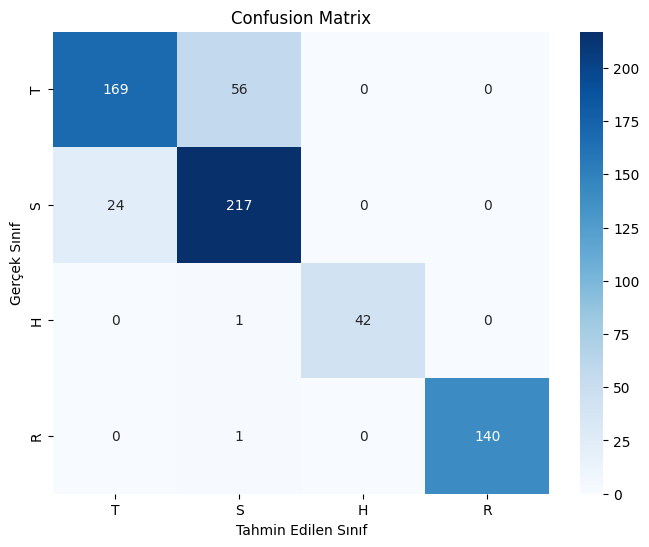

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['T', 'S', 'H','R'], yticklabels=['T', 'S', 'H','R'])
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Confusion Matrix')
plt.show()